In [1]:
import pandas as pd

# Dataset

In [2]:
df = pd.read_csv('Data_Breach_Notifications_Affecting_Washington_Residents_(Personal_Information_Breakdown)_20260202.csv')

# Dataset overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           6700 non-null   object 
 1   DateAware                    6619 non-null   object 
 2   DateSubmitted                6700 non-null   object 
 3   DataBreachCause              6700 non-null   object 
 4   DateStart                    5996 non-null   object 
 5   DateEnd                      5690 non-null   object 
 6   Name                         6700 non-null   object 
 7   CyberattackType              4951 non-null   object 
 8   WashingtoniansAffected       6618 non-null   float64
 9   IndustryType                 6700 non-null   object 
 10  BusinessType                 2887 non-null   object 
 11  InformationType              6700 non-null   object 
 12  Year                         6700 non-null   int64  
 13  WashingtoniansAffe

# MISSING VALUES in 'WashintoniansAffected' handled with Median

In [4]:
# Fill missing numeric values with median
df['WashingtoniansAffected'] = df['WashingtoniansAffected'].fillna(df['WashingtoniansAffected'].median())


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           6700 non-null   object 
 1   DateAware                    6619 non-null   object 
 2   DateSubmitted                6700 non-null   object 
 3   DataBreachCause              6700 non-null   object 
 4   DateStart                    5996 non-null   object 
 5   DateEnd                      5690 non-null   object 
 6   Name                         6700 non-null   object 
 7   CyberattackType              4951 non-null   object 
 8   WashingtoniansAffected       6700 non-null   float64
 9   IndustryType                 6700 non-null   object 
 10  BusinessType                 2887 non-null   object 
 11  InformationType              6700 non-null   object 
 12  Year                         6700 non-null   int64  
 13  WashingtoniansAffe

# MISSING VALUES in 'CyberattackType' handled with Machine Learning Imputation

In [6]:
df['CyberattackType']

,CyberattackType
0,Unclear/unknown
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6695,NaN
6696,NaN
6697,NaN
6698,NaN


In [7]:
df['CyberattackType'].unique()

array(['Unclear/unknown', nan, 'Phishing', 'Malware', 'Other', 'Skimmers',
       'Ransomware'], dtype=object)

In [8]:
import numpy as np

df['CyberattackType'] = (
    df['CyberattackType']
    .str.strip()
    .replace([
        'Unclear/unknown'
    ], np.nan)
)


In [9]:
df['CyberattackType'].unique()

array([nan, 'Phishing', 'Malware', 'Other', 'Skimmers', 'Ransomware'],
      dtype=object)

In [10]:
features = [
    'DataBreachCause',
    'IndustryType',
    'InformationType',
    'WashingtoniansAffected'
]

target = 'CyberattackType'


In [11]:
df_known = df[df[target].notna()].copy()
df_missing = df[df[target].isna()].copy()


In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

cat_cols = [
    'DataBreachCause',
    'IndustryType',
    'InformationType'
]

num_cols = ['WashingtoniansAffected']

encoder = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

# Fit on known data
X_cat_known = encoder.fit_transform(df_known[cat_cols])
X_cat_missing = encoder.transform(df_missing[cat_cols])

X_num_known = df_known[num_cols].values
X_num_missing = df_missing[num_cols].values

X_known = np.hstack([X_num_known, X_cat_known])
X_missing = np.hstack([X_num_missing, X_cat_missing])

y_known = df_known[target]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_known,
    y_known,
    test_size=0.25,
    random_state=42,
    stratify=y_known
)


In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.418

Classification Report:
              precision    recall  f1-score   support

     Malware       0.25      0.26      0.25       195
       Other       0.13      0.13      0.13       147
    Phishing       0.20      0.24      0.22       137
  Ransomware       0.61      0.57      0.59       665
    Skimmers       0.00      0.00      0.00         8

    accuracy                           0.42      1152
   macro avg       0.24      0.24      0.24      1152
weighted avg       0.43      0.42      0.42      1152



In [16]:
clf.fit(X_known, y_known)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.982

Classification Report:
              precision    recall  f1-score   support

     Malware       0.97      0.94      0.96       195
       Other       0.96      0.99      0.97       147
    Phishing       0.99      1.00      0.99       137
  Ransomware       1.00      0.99      0.99       665
    Skimmers       0.50      1.00      0.67         8

    accuracy                           0.98      1152
   macro avg       0.88      0.98      0.92      1152
weighted avg       0.99      0.98      0.98      1152



In [18]:
# Replace the missing values in 'CyberattackType' variable
predicted_types = clf.predict(X_missing)

df.loc[df[target].isna(), target] = predicted_types


In [19]:
df['CyberattackType']

,CyberattackType
0,Ransomware
1,Ransomware
2,Ransomware
3,Ransomware
4,Ransomware
...,...
6695,Phishing
6696,Phishing
6697,Phishing
6698,Phishing


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           6700 non-null   object 
 1   DateAware                    6619 non-null   object 
 2   DateSubmitted                6700 non-null   object 
 3   DataBreachCause              6700 non-null   object 
 4   DateStart                    5996 non-null   object 
 5   DateEnd                      5690 non-null   object 
 6   Name                         6700 non-null   object 
 7   CyberattackType              6700 non-null   object 
 8   WashingtoniansAffected       6700 non-null   float64
 9   IndustryType                 6700 non-null   object 
 10  BusinessType                 2887 non-null   object 
 11  InformationType              6700 non-null   object 
 12  Year                         6700 non-null   int64  
 13  WashingtoniansAffe

# EDA

How many breach that has less/higher than 500 affected Washingtonians?

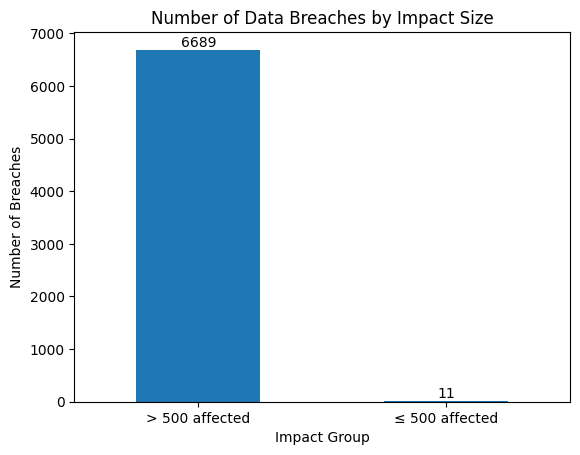

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create impact category
df['ImpactGroup'] = df['WashingtoniansAffected'].apply(
    lambda x: '≤ 500 affected' if x <= 500 else '> 500 affected'
)

# Count breaches
impact_counts = df['ImpactGroup'].value_counts()

# Plot
plt.figure()
bars = impact_counts.plot(kind='bar')

plt.title('Number of Data Breaches by Impact Size')
plt.xlabel('Impact Group')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=0)

# Add numbers on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.show()




### Outlier Detection:
Should we remove outliers?
The extreme values in WashingtoniansAffected represent real, high-impact breach incidents rather than data errors. Since the objective is to inform policy makers about data breach risk, these outliers are retained and treated as meaningful indicators of severe cybersecurity incidents.

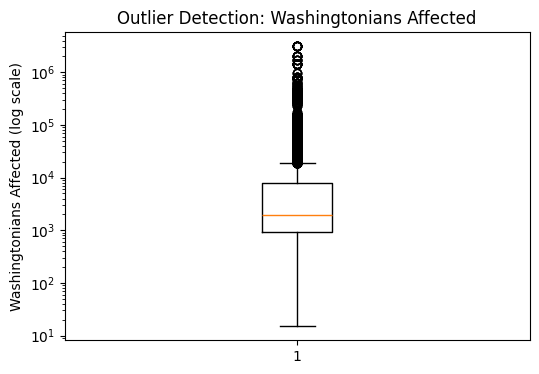

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df['WashingtoniansAffected'].dropna())
plt.yscale('log')
plt.ylabel('Washingtonians Affected (log scale)')
plt.title('Outlier Detection: Washingtonians Affected')
plt.show()

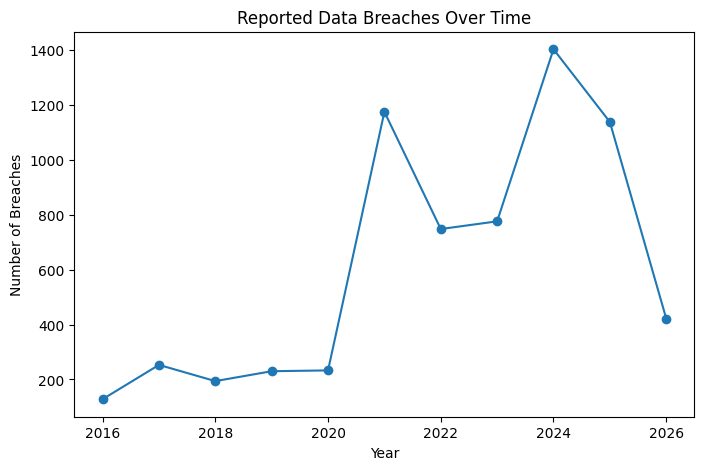

In [23]:
import matplotlib.pyplot as plt

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.title('Reported Data Breaches Over Time')
plt.show()

### To understand the huge jump from 2020 to 2021

In [24]:
breach_cause_year = (
    df[df['Year'].isin([2020, 2021])]
    .groupby(['Year', 'DataBreachCause','CyberattackType'])
    .size()
    .reset_index(name='Count')
)

breach_cause_year




,Year,DataBreachCause,CyberattackType,Count
0,2020,Cyberattack,Malware,56
1,2020,Cyberattack,Other,8
2,2020,Cyberattack,Phishing,37
3,2020,Cyberattack,Ransomware,39
4,2020,Cyberattack,Skimmers,4
5,2020,Theft or Mistake,Malware,5
6,2020,Theft or Mistake,Ransomware,4
7,2020,Unauthorized Access,Malware,11
8,2020,Unauthorized Access,Other,30
9,2020,Unauthorized Access,Phishing,4


### What caused a sudden jump in 2021

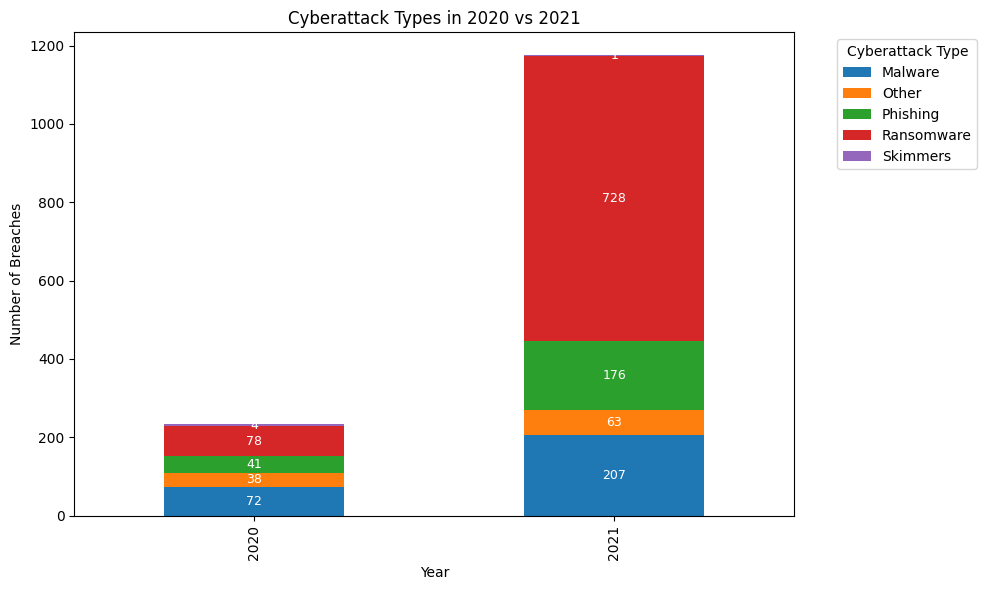

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for 2020 and 2021
df_2020_2021 = df[df['Year'].isin([2020, 2021])]

# Pivot: Year x CyberattackType
pivot = df_2020_2021.groupby(['Year', 'CyberattackType']).size().unstack(fill_value=0)

# Plot stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Add numbers on each segment
for i, year in enumerate(pivot.index):
    bottom = 0
    for j, col in enumerate(pivot.columns):
        value = pivot.loc[year, col]
        if value > 0:
            ax.text(
                i,               # x-position
                bottom + value/2, # y-position: middle of segment
                str(value),       # text to display
                ha='center',
                va='center',
                fontsize=9,
                color='white'     # good contrast for dark bars
            )
            bottom += value  # update bottom for next segment

plt.title('Cyberattack Types in 2020 vs 2021')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(title='Cyberattack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


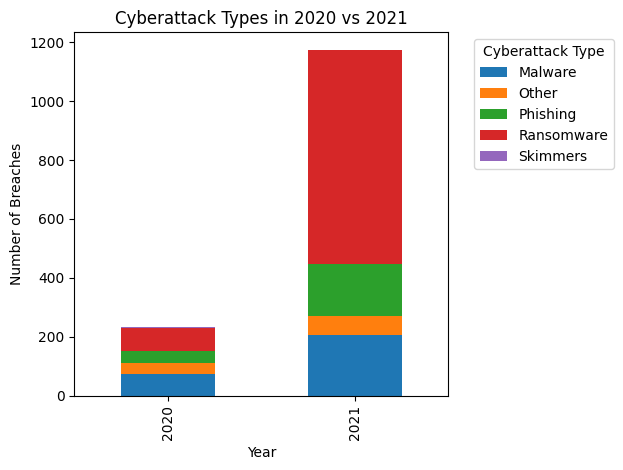

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Make sure your dataset is loaded ---
# Example:
# df = pd.read_csv("data_breach_notifications.csv")

# Filter for years 2020 and 2021
df_2020_2021 = df[df['Year'].isin([2020, 2021])]

# Group and pivot
attack_pivot = (
    df_2020_2021
    .groupby(['Year', 'CyberattackType'])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
attack_pivot.plot(kind='bar', stacked=True)

plt.title('Cyberattack Types in 2020 vs 2021')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(title='Cyberattack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


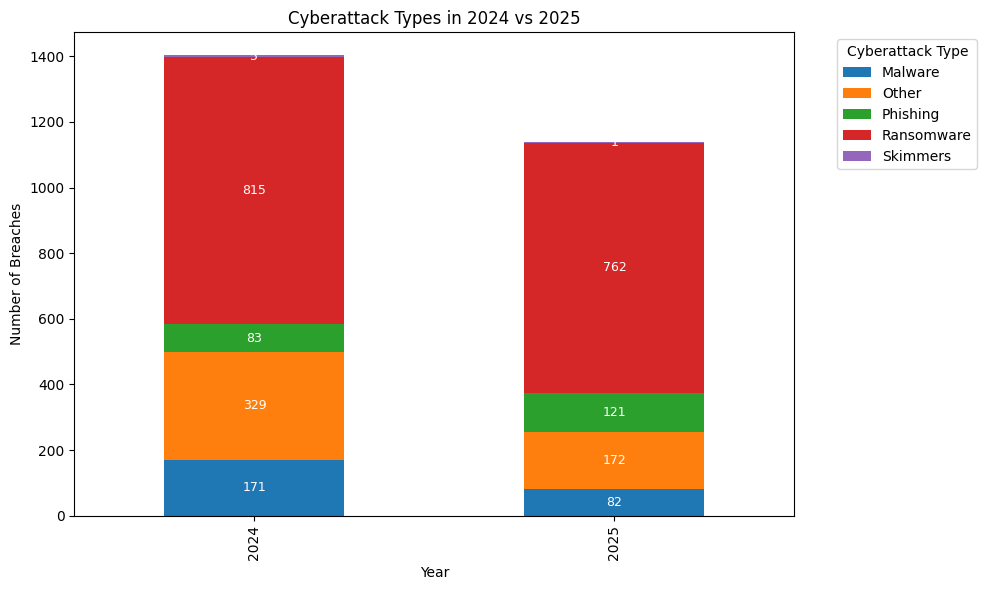

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for 2020 and 2021
df_2024_2025 = df[df['Year'].isin([2024, 2025])]

# Pivot: Year x CyberattackType
pivot = df_2024_2025.groupby(['Year', 'CyberattackType']).size().unstack(fill_value=0)

# Plot stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Add numbers on each segment
for i, year in enumerate(pivot.index):
    bottom = 0
    for j, col in enumerate(pivot.columns):
        value = pivot.loc[year, col]
        if value > 0:
            ax.text(
                i,               # x-position
                bottom + value/2, # y-position: middle of segment
                str(value),       # text to display
                ha='center',
                va='center',
                fontsize=9,
                color='white'     # good contrast for dark bars
            )
            bottom += value  # update bottom for next segment

plt.title('Cyberattack Types in 2024 vs 2025')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(title='Cyberattack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### To understand what dominates the 2024 attack types

In [28]:
df_2024 = df[df['Year'] == 2024]


In [29]:
df_2024.shape


(1403, 17)

In [30]:
cyberattack_2024 = (
    df_2024.groupby('CyberattackType')
           .size()
           .reset_index(name='Count')
           .sort_values('Count', ascending=False)
)

cyberattack_2024


,CyberattackType,Count
3,Ransomware,815
1,Other,329
0,Malware,171
2,Phishing,83
4,Skimmers,5


Data Breach By Industry

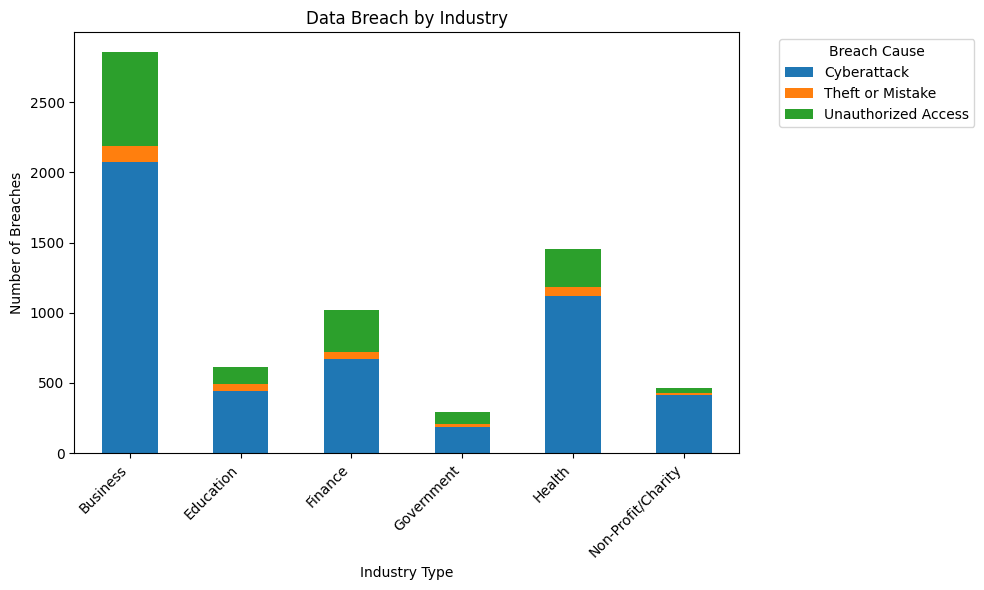

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter rows with missing values
df_plot = df[['IndustryType', 'DataBreachCause']].dropna()

# Create a pivot table: IndustryType x DataBreachCause
pivot = df_plot.pivot_table(
    index='IndustryType',
    columns='DataBreachCause',
    aggfunc='size',
    fill_value=0
)

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Data Breach by Industry')
plt.xlabel('Industry Type')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Breach Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### The most cyber attack type

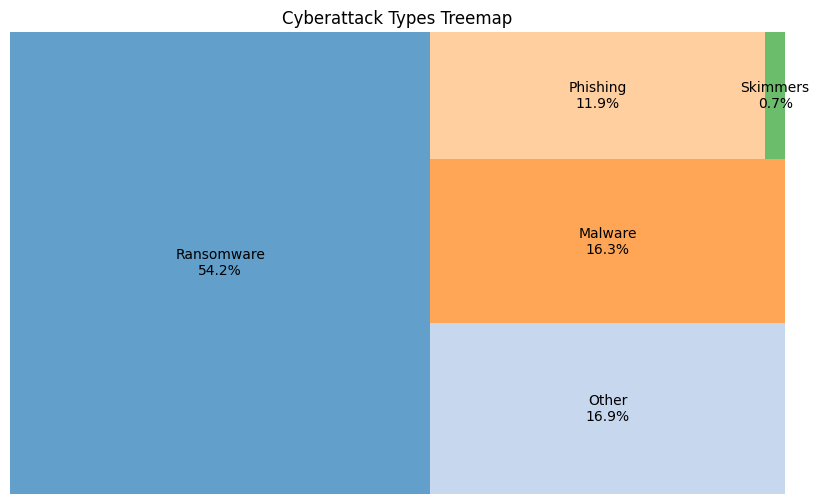

In [32]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Count occurrences of each cyberattack type
cyber_counts = df['CyberattackType'].value_counts()

# Calculate percentages
cyber_percent = (cyber_counts / cyber_counts.sum() * 100).round(1)

# Create labels with both name and percentage
labels = [f"{cat}\n{perc}%" for cat, perc in zip(cyber_counts.index, cyber_percent)]

# Plot treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=cyber_counts.values,
    label=labels,
    alpha=0.7,
    color=plt.cm.tab20.colors  # optional color palette
)
plt.axis('off')
plt.title('Cyberattack Types Treemap')
plt.show()


### Most common types of personal information compromised

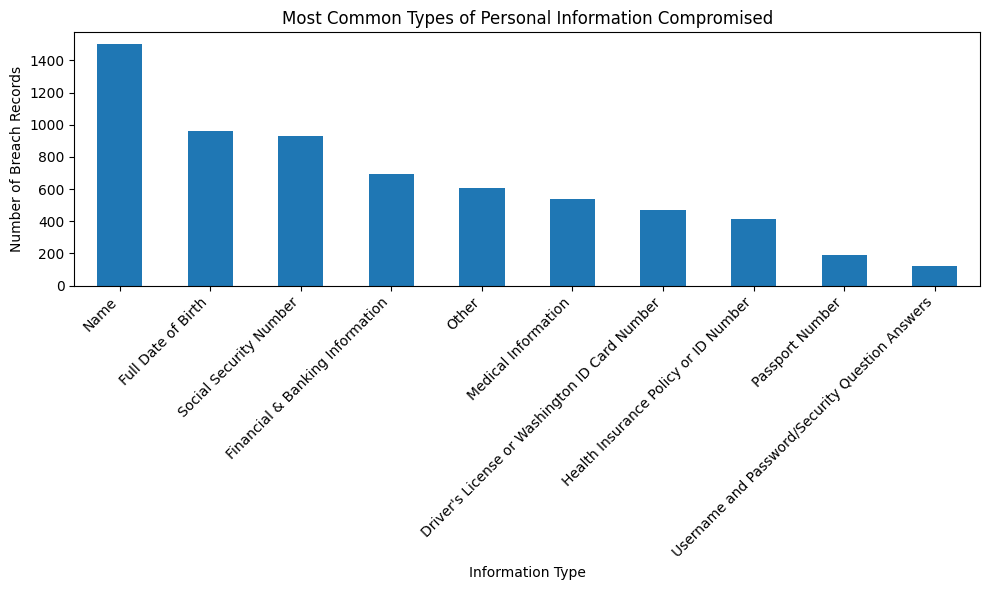

In [33]:
import matplotlib.pyplot as plt

info_counts = df['InformationType'].value_counts().head(10)

plt.figure(figsize=(10, 6))
info_counts.plot(kind='bar')
plt.ylabel('Number of Breach Records')
plt.xlabel('Information Type')
plt.title('Most Common Types of Personal Information Compromised')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

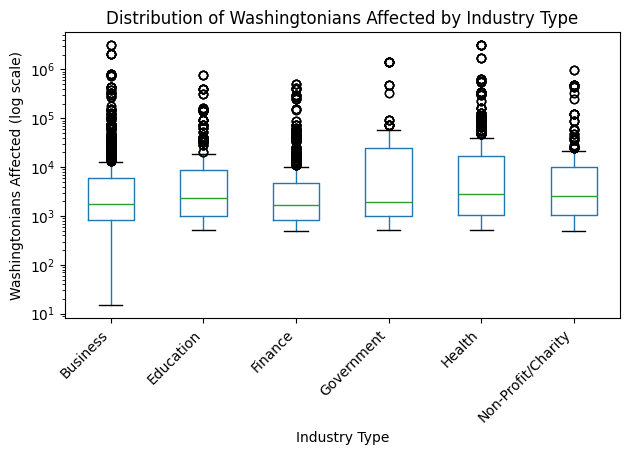

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your dataframe is called df

# 1. Drop rows with missing WashingtoniansAffected or IndustryType
df_box = df.dropna(subset=['WashingtoniansAffected', 'IndustryType'])

# 2. Keep industries with enough observations (e.g., at least 30 breaches)
industry_counts = df_box['IndustryType'].value_counts()
valid_industries = industry_counts[industry_counts >= 30].index

df_box = df_box[df_box['IndustryType'].isin(valid_industries)]

# 3. Create the boxplot
plt.figure(figsize=(14, 7))
df_box.boxplot(
    column='WashingtoniansAffected',
    by='IndustryType',
    grid=False,
    showfliers=True
)

# 4. Improve readability
plt.yscale('log')  # IMPORTANT for skewed data
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry Type')
plt.ylabel('Washingtonians Affected (log scale)')
plt.title('Distribution of Washingtonians Affected by Industry Type')
plt.suptitle('')  # Remove automatic pandas subtitle

plt.tight_layout()
plt.show()


# Clustering with K-prototypes

In [35]:
!pip install kmodes


In [36]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import numpy as np


In [37]:
# Replace 'df' with your dataframe name
cluster_vars = [
    'CyberattackType',
    'DataBreachCause',
    'WashingtoniansAffected',
    'IndustryType',
    'InformationType'
]

df_cluster = df[cluster_vars].copy()


In [38]:
categorical_cols = ['CyberattackType', 'DataBreachCause', 'IndustryType', 'InformationType']

In [39]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CyberattackType         6700 non-null   object 
 1   DataBreachCause         6700 non-null   object 
 2   WashingtoniansAffected  6700 non-null   float64
 3   IndustryType            6700 non-null   object 
 4   InformationType         6700 non-null   object 
dtypes: float64(1), object(4)
memory usage: 261.8+ KB


In [40]:
for col in categorical_cols:
    df_cluster[col] = df_cluster[col].astype(str)


In [41]:
# K-Prototypes requires categorical columns as indices
cat_columns_idx = [df_cluster.columns.get_loc(col) for col in categorical_cols]

# Convert dataframe to numpy array
X = df_cluster.values


In [42]:
# Choose number of clusters, e.g., k=3
k = 3

kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=1, random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_columns_idx)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 466, ncost: 80610204071891.31
Run: 1, iteration: 2/100, moves: 447, ncost: 37561457541227.62
Run: 1, iteration: 3/100, moves: 140, ncost: 27995764908702.934
Run: 1, iteration: 4/100, moves: 4, ncost: 27985528568417.97
Run: 1, iteration: 5/100, moves: 3, ncost: 27982902484016.594
Run: 1, iteration: 6/100, moves: 0, ncost: 27982902484016.594
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iter

In [43]:
df_cluster['Cluster'] = clusters


In [44]:
cluster_counts = df_cluster['Cluster'].value_counts()
print(cluster_counts)


Cluster
2    6492
0     170
1      38
Name: count, dtype: int64


In [ ]:
# TEMP
# List of categorical variables used in clustering
categorical_cols = ['CyberattackType', 'DataBreachCause', 'IndustryType', 'InformationType']

# Create summary list
cluster_summary = []

for cluster in sorted(df_cluster['Cluster'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]

    # Average affected residents
    avg_affected = cluster_data['WashingtoniansAffected'].mean()

    # Top 3 categories per categorical variable
    top_categories = {}
    for col in categorical_cols:
        top_categories[col] = cluster_data[col].value_counts().head(5).to_dict()

    cluster_summary.append({
        'Cluster': cluster,
        'Avg_WashingtoniansAffected': avg_affected,
        'Top_Categories': top_categories
    })

# Convert to dataframe for display
summary_df = pd.DataFrame(cluster_summary)

# Show full content
pd.set_option('display.max_colwidth', None)
print(summary_df)


   Cluster  Avg_WashingtoniansAffected  \
0        0                4.511717e+05   
1        1                2.178771e+06   
2        2                9.941753e+03   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Top_Categories  
0                                                                       {'CyberattackType': {'Ransomware': 135, 'Other': 34, 'Malware': 1}, 'DataBreachCause': {'Cyberattack': 106, 'Unauthorized Access': 56, 'Theft or Mistake': 8}, 'IndustryType': {'Health': 52, 'Business': 47, 'Finance': 27, 'Non-Profit/Charity': 21, 'Education': 16}, 'InformationType': {'Name'

In [45]:
# Create a slide-ready cluster summary
summary_rows = []

for cluster in sorted(df_cluster['Cluster'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]

    avg_affected = cluster_data['WashingtoniansAffected'].mean()

    # Get top 3 categories for each categorical variable
    top_cyberattack = cluster_data['CyberattackType'].value_counts().head(3).to_dict()
    top_breach_cause = cluster_data['DataBreachCause'].value_counts().head(3).to_dict()
    top_industry = cluster_data['IndustryType'].value_counts().head(3).to_dict()
    top_info = cluster_data['InformationType'].value_counts().head(3).to_dict()

    summary_rows.append({
        'Cluster': cluster,
        'Avg_WashingtoniansAffected': round(avg_affected,2),
        'Top_CyberattackType': top_cyberattack,
        'Top_DataBreachCause': top_breach_cause,
        'Top_IndustryType': top_industry,
        'Top_InformationType': top_info
    })

summary_df = pd.DataFrame(summary_rows)

# Display full content
pd.set_option('display.max_colwidth', None)
print(summary_df)


   Cluster  Avg_WashingtoniansAffected  \
0        0                   451171.72   
1        1                  2178770.58   
2        2                     9941.75   

                                    Top_CyberattackType  \
0        {'Ransomware': 133, 'Other': 36, 'Malware': 1}   
1         {'Malware': 19, 'Ransomware': 10, 'Other': 9}   
2  {'Ransomware': 3491, 'Other': 1087, 'Malware': 1069}   

                                                           Top_DataBreachCause  \
0       {'Cyberattack': 106, 'Unauthorized Access': 56, 'Theft or Mistake': 8}   
1                                {'Cyberattack': 33, 'Unauthorized Access': 5}   
2  {'Cyberattack': 4767, 'Unauthorized Access': 1417, 'Theft or Mistake': 308}   

                                     Top_IndustryType  \
0       {'Health': 52, 'Business': 47, 'Finance': 27}   
1    {'Health': 14, 'Government': 12, 'Business': 12}   
2  {'Business': 2797, 'Health': 1385, 'Finance': 996}   

                                    

In [46]:
# Assume df_cluster has Cluster labels
cluster_top_industries = {}

for cluster in sorted(df_cluster['Cluster'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    top_industries = cluster_data['IndustryType'].value_counts().to_dict()
    cluster_top_industries[cluster] = top_industries

# Display
for c, inds in cluster_top_industries.items():
    print(f"\nCluster {c} Top Industries:")
    for ind, count in sorted(inds.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{ind}: {count}")



Cluster 0 Top Industries:
Health: 52
Business: 47
Finance: 27
Non-Profit/Charity: 21
Education: 16

Cluster 1 Top Industries:
Health: 14
Government: 12
Business: 12

Cluster 2 Top Industries:
Business: 2797
Health: 1385
Finance: 996
Education: 594
Non-Profit/Charity: 446


## Cluster Visualization with PCA

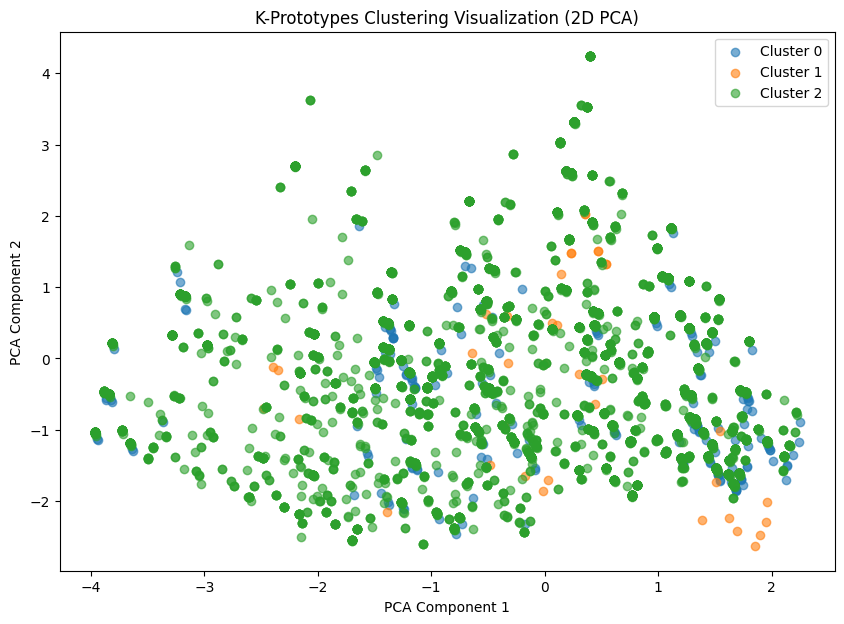

In [48]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume df_cluster has 'Cluster' column from K-Prototypes
# And the variables used are:
categorical_cols = ['CyberattackType', 'DataBreachCause', 'IndustryType', 'InformationType']
numeric_col = ['WashingtoniansAffected']

# 1️⃣ Separate numeric and categorical
X_num = df_cluster[numeric_col].values
X_cat = df_cluster[categorical_cols].astype(str)

# 2️⃣ One-hot encode categorical
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_enc = encoder.fit_transform(X_cat)

# 3️⃣ Combine numeric + categorical
X_all = np.hstack([X_num, X_cat_enc])

# 4️⃣ Standardize for PCA
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# 5️⃣ Reduce to 2D with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_all_scaled)

# 6️⃣ Plot clusters
plt.figure(figsize=(10,7))
for cluster in sorted(df_cluster['Cluster'].unique()):
    plt.scatter(
        X_pca[df_cluster['Cluster']==cluster, 0],
        X_pca[df_cluster['Cluster']==cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Prototypes Clustering Visualization (2D PCA)')
plt.legend()
plt.show()

## Cluster Visualization with Isomap

In [53]:
from sklearn.manifold import Isomap


In [54]:
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)


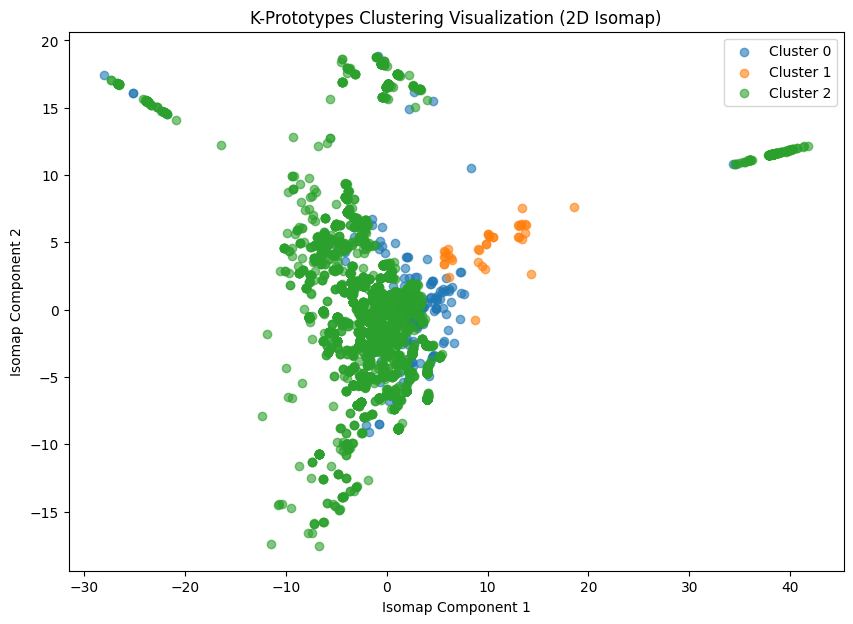

In [88]:
# 5️⃣ Reduce to 2D with Isomap
isomap = Isomap(
    n_components=2,
    n_neighbors=75   # controls neighborhood graph
)

X_isomap = isomap.fit_transform(X_all_scaled)

# 6️⃣ Plot clusters
plt.figure(figsize=(10,7))

for cluster in sorted(df_cluster['Cluster'].unique()):
    plt.scatter(
        X_isomap[df_cluster['Cluster']==cluster, 0],
        X_isomap[df_cluster['Cluster']==cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('K-Prototypes Clustering Visualization (2D Isomap)')
plt.legend()
plt.show()


## Cluster Visualization using Autoencodder Embeddings

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [62]:
input_dim = X_all_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(2, activation='linear')(encoded)   # 2D embedding

# Decoder
decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Build model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(
    optimizer='adam',
    loss='mse'
)


In [63]:
autoencoder.fit(
    X_all_scaled,
    X_all_scaled,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9178 - val_loss: 0.8392
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7981 - val_loss: 0.7874
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7646 - val_loss: 0.7513
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7179 - val_loss: 0.7160
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6889 - val_loss: 0.6734
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6584 - val_loss: 0.6325
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6148 - val_loss: 0.6003
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5789 - val_loss: 0.5788
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5777 - val_loss: 0.5513
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5467 - val_loss: 0.5362
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5304 - val_loss: 0.5200
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [64]:
encoder = Model(inputs=input_layer, outputs=latent)

X_auto = encoder.predict(X_all_scaled)


210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


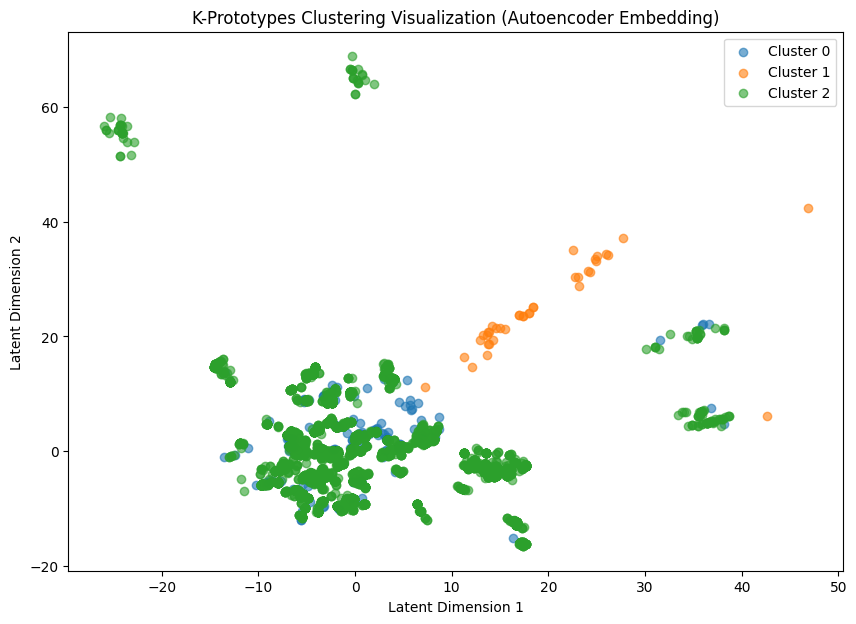

In [65]:
plt.figure(figsize=(10,7))

for cluster in sorted(df_cluster['Cluster'].unique()):
    plt.scatter(
        X_auto[df_cluster['Cluster']==cluster, 0],
        X_auto[df_cluster['Cluster']==cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('K-Prototypes Clustering Visualization (Autoencoder Embedding)')
plt.legend()
plt.show()


## Elbow Plot

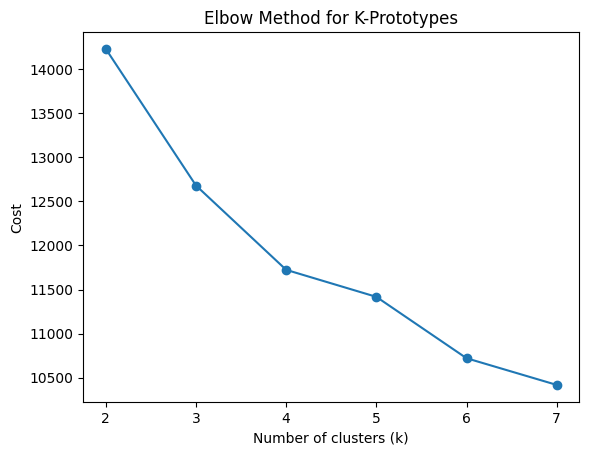

In [ ]:
from kmodes.kprototypes import KPrototypes
costs = []
K_range = range(2, 8)

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0, random_state=42)
    kproto.fit_predict(X_all, categorical=[0,1,2,3])  # indices of categorical columns
    costs.append(kproto.cost_)

import matplotlib.pyplot as plt
plt.plot(K_range, costs, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for K-Prototypes')
plt.show()
